In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [3]:
df = pd.read_csv(r"C:\Users\kavya\Downloads\E_Commerce.csv")

In [4]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [7]:
# Quick overview
print("Dataset shape:", df.shape)
display(df.head())


Dataset shape: (10999, 12)


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [8]:
# --- Data Cleaning & Inspection ---
print("\n--- Data Info ---")
print(df.info())


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB
None


In [9]:

print("\n--- Missing Values ---")
print(df.isnull().sum())




--- Missing Values ---
ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


In [10]:
print("\n--- Duplicates ---")
dupes = df.duplicated().sum()
print("Number of duplicate rows:", dupes)


--- Duplicates ---
Number of duplicate rows: 0


In [11]:
# If ID column exists and is unique, drop it for modelling
if 'ID' in df.columns:
    if df['ID'].nunique() == df.shape[0]:
        df = df.drop(columns=['ID'])
        print("\nDropped unique ID column for modelling.")


Dropped unique ID column for modelling.


In [12]:
# Basic stats
print("\n--- Numerical Summary ---")
display(df.describe())


--- Numerical Summary ---


,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [13]:
# Ensure target is integer
target_col = 'Reached.on.Time_Y.N'
df[target_col] = df[target_col].astype(int)

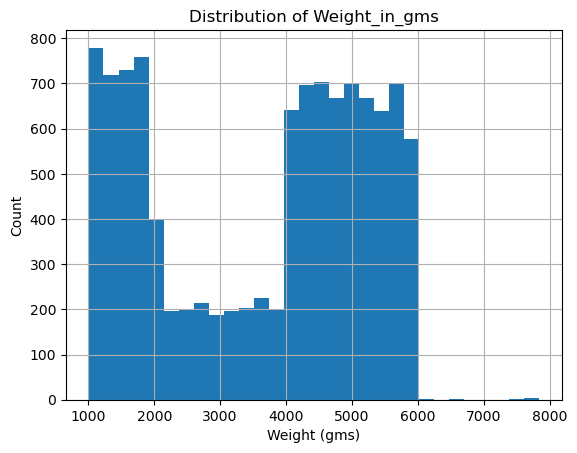

In [14]:
# --- Exploratory Data Analysis (EDA) ---
# Distribution: Weight_in_gms and Cost_of_the_Product
plt.figure()
df['Weight_in_gms'].hist(bins=30)
plt.title('Distribution of Weight_in_gms')
plt.xlabel('Weight (gms)')
plt.ylabel('Count')
plt.show()

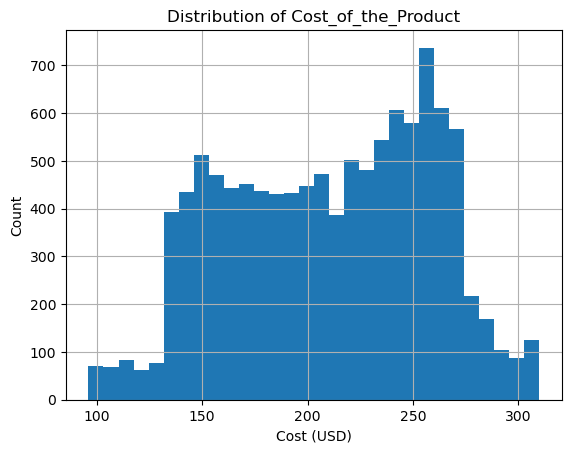

In [15]:
plt.figure()
df['Cost_of_the_Product'].hist(bins=30)
plt.title('Distribution of Cost_of_the_Product')
plt.xlabel('Cost (USD)')
plt.ylabel('Count')
plt.show()

<Figure size 640x480 with 0 Axes>

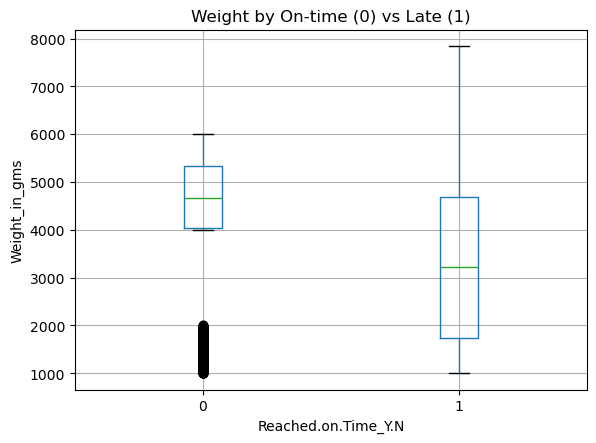

In [16]:
# Relationship of target with weight and cost (boxplots)
plt.figure()
df.boxplot(column='Weight_in_gms', by=target_col)
plt.title('Weight by On-time (0) vs Late (1)')
plt.suptitle('')
plt.xlabel('Reached.on.Time_Y.N')
plt.ylabel('Weight_in_gms')
plt.show()

<Figure size 640x480 with 0 Axes>

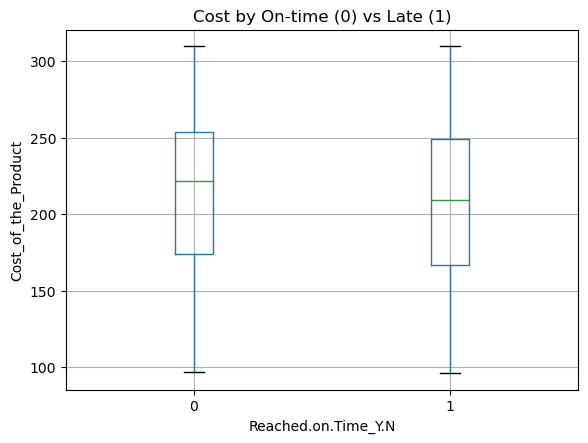

In [17]:
plt.figure()
df.boxplot(column='Cost_of_the_Product', by=target_col)
plt.title('Cost by On-time (0) vs Late (1)')
plt.suptitle('')
plt.xlabel('Reached.on.Time_Y.N')
plt.ylabel('Cost_of_the_Product')
plt.show()

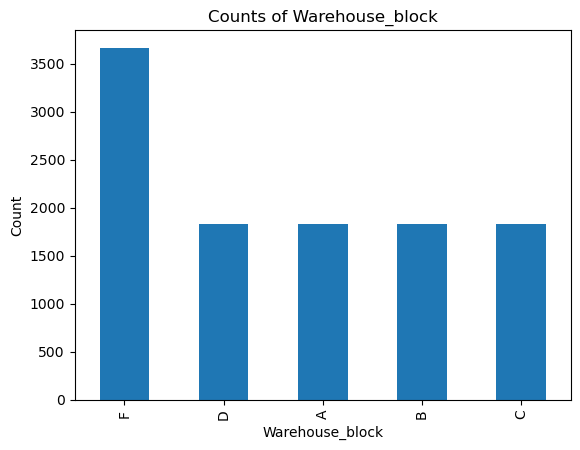

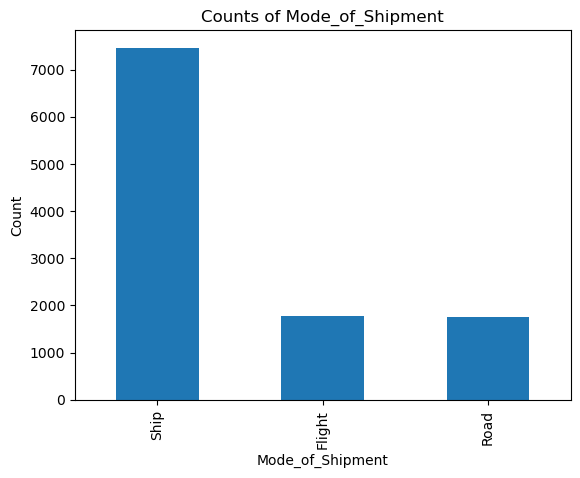

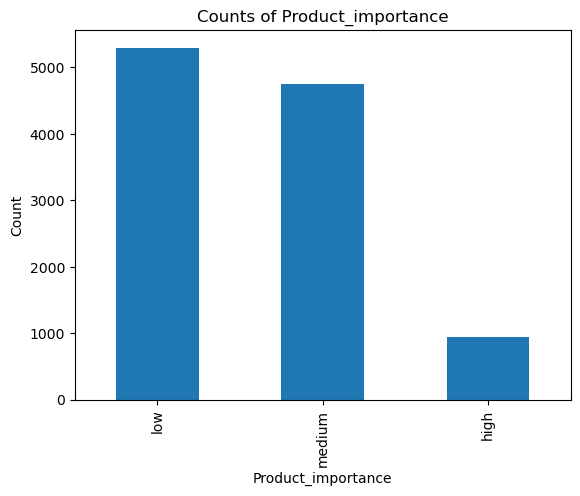

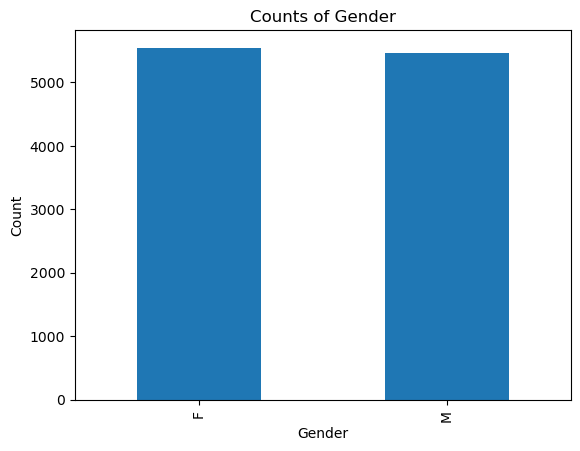

In [18]:
# Categorical counts
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
for col in categorical_cols:
    if col in df.columns:
        plt.figure()
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Counts of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()


In [19]:
# Calls vs Target (mean calls by target)
print("\nMean Customer_care_calls by target:")
print(df.groupby(target_col)['Customer_care_calls'].mean())


Mean Customer_care_calls by target:
Reached.on.Time_Y.N
0    4.147656
1    3.991467
Name: Customer_care_calls, dtype: float64


<Figure size 640x480 with 0 Axes>

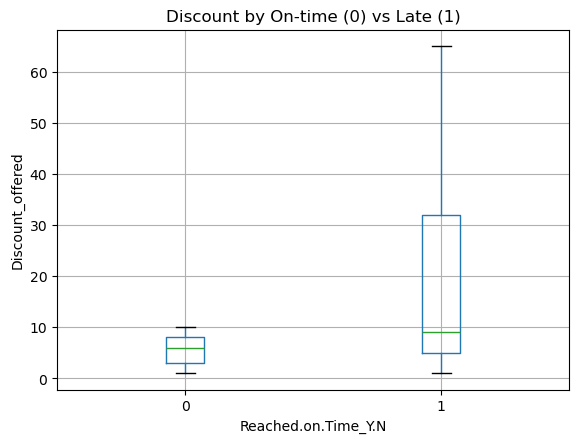

In [20]:
# Discount and prior purchases relation
if 'Discount_offered' in df.columns:
    plt.figure()
    df.boxplot(column='Discount_offered', by=target_col)
    plt.title('Discount by On-time (0) vs Late (1)')
    plt.suptitle('')
    plt.xlabel('Reached.on.Time_Y.N')
    plt.ylabel('Discount_offered')
    plt.show()

<Figure size 640x480 with 0 Axes>

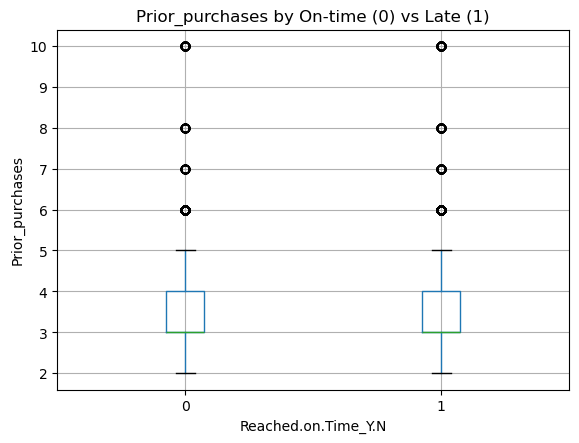

In [21]:
if 'Prior_purchases' in df.columns:
    plt.figure()
    df.boxplot(column='Prior_purchases', by=target_col)
    plt.title('Prior_purchases by On-time (0) vs Late (1)')
    plt.suptitle('')
    plt.xlabel('Reached.on.Time_Y.N')
    plt.ylabel('Prior_purchases')
    plt.show()